In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.shape

(244, 7)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


## One Sample T Test (Tek Orneklem T Testi)(for total_bill)

In [7]:
# Select First Column (ilk kolunu secmek)
df.iloc[:,0:1]

df.loc[:, 'total_bill']

df['total_bill'].head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [8]:
df.iloc[:,0:1].head()

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


In [9]:
df.loc[:, 'total_bill'].head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [10]:
#Selecet random 50 index (ilk kolondan rastgele 50 deger secmek)

np.random.seed(123)
r1 = np.random.randint(0,243, 30)
r1

array([109, 126,  66, 220,  98, 230,  17,  83, 106, 123,  57, 214, 225,
        96, 113, 126,  47,  73,  32, 174, 224, 111, 153,  83,  78, 164,
        96, 208,  68,  49])

In [11]:
r1.mean()

118.96666666666667

In [12]:
r1.size

30

In [13]:
r1.sort()
r1

array([ 17,  32,  47,  49,  57,  66,  68,  73,  78,  83,  83,  96,  96,
        98, 106, 109, 111, 113, 123, 126, 126, 153, 164, 174, 208, 214,
       220, 224, 225, 230])

In [14]:
# Duplicate Values Droped (Ayni degerler silindi)
r1 = np.unique(r1)
print(r1.size)
r1

27


array([ 17,  32,  47,  49,  57,  66,  68,  73,  78,  83,  96,  98, 106,
       109, 111, 113, 123, 126, 153, 164, 174, 208, 214, 220, 224, 225,
       230])

In [15]:
# ilk kolondan listedeki indexleri secmek

olcumler = df['total_bill'][r1]
olcumler.head()

17    16.29
32    15.06
47    32.40
49    18.04
57    26.41
Name: total_bill, dtype: float64

In [16]:
olcumler.describe()

count    27.000000
mean     20.057037
std       6.549949
min       7.250000
25%      16.110000
50%      20.230000
75%      24.410000
max      32.680000
Name: total_bill, dtype: float64

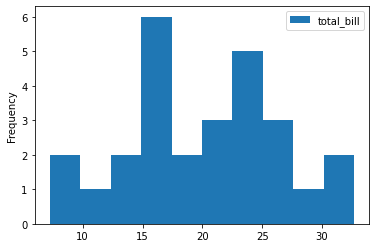

In [17]:
# Normallik Varsayimi

# histogram

pd.DataFrame(olcumler).plot.hist();

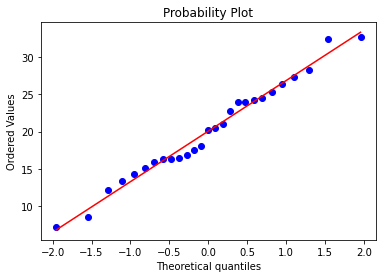

In [18]:
#qqplot
import scipy.stats as stats
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

In [19]:
# Varsayimlar

# 1 - Normallik

# Shapiro Testi 

from scipy.stats import shapiro

In [20]:
# H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlanmli bir farklilik yoktur

# H1: ... fark vardır

In [21]:
shapiro(olcumler)

ShapiroResult(statistic=0.9780264496803284, pvalue=0.8153059482574463)

In [22]:
ista , p = shapiro(olcumler)
print('istatstistk Deger = %.4f , P-Value = %.4f' % (ista, p))

istatstistk Deger = 0.9780 , P-Value = 0.8153


Sonuc : p > 0.05

In [23]:
# Varsayimlar

# 2 - Varyans Homejenligi

stats.ttest_1samp(olcumler, popmean= 100)

Ttest_1sampResult(statistic=-63.41969927114395, pvalue=4.920658405580595e-30)

In [90]:
n1 = np.arange(1,100)
n1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [27]:
for i in n1:
    a = stats.ttest_1samp(olcumler, popmean=i)[1] 
    if a > 0.05 :
        print ('Fatura = %.2f, P = %.4f' % (i, a))

Fatura = 18.00, P = 0.1148
Fatura = 19.00, P = 0.4094
Fatura = 20.00, P = 0.9643
Fatura = 21.00, P = 0.4611
Fatura = 22.00, P = 0.1353


## 2. One Sample T Testi (for Tips)

In [29]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [81]:
olcumler2 = df.loc[:, 'tip'].sample(n=50, random_state=756)
olcumler2.head()

156    5.00
10     1.71
7      3.12
107    4.29
26     2.00
Name: tip, dtype: float64

In [82]:
shapiro(olcumler2)

ShapiroResult(statistic=0.9540871381759644, pvalue=0.050334375351667404)

In [83]:
olcumler2.mean()

2.6746

In [84]:
df['tip'].mean()

2.9982786885245902

In [151]:
# Testin Uygulanmasi

df2 = pd.DataFrame(columns=['tip', 'P-Value'])
for i in (np.arange(1,5, 0.1)):
    b = stats.ttest_1samp(olcumler2, popmean=i)[1] 
    if b > 0.05 :
        print ('Bahsis = %.2f, P = %.4f' % (i, b))
        df2 = df2.append({'tip':i, 'P-Value':b}, ignore_index=True)
df2

Bahsis = 2.40, P = 0.0594
Bahsis = 2.50, P = 0.2257
Bahsis = 2.60, P = 0.6025
Bahsis = 2.70, P = 0.8591
Bahsis = 2.80, P = 0.3825
Bahsis = 2.90, P = 0.1196


,tip,P-Value
0,2.4,0.059436
1,2.5,0.225682
2,2.6,0.602465
3,2.7,0.859067
4,2.8,0.382483
5,2.9,0.119625


# Append

Signature:
df.append(
    other,
    ignore_index: 'bool' = False,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
) -> 'DataFrame'
Docstring:
Append rows of `other` to the end of caller, returning a new object.

Columns in `other` that are not in the caller are added as new columns.

Parameters
----------
other : DataFrame or Series/dict-like object, or list of these
    The data to append.
ignore_index : bool, default False
    If True, the resulting axis will be labeled 0, 1, …, n - 1.
verify_integrity : bool, default False
    If True, raise ValueError on creating index with duplicates.
sort : bool, default False
    Sort columns if the columns of `self` and `other` are not aligned.